# Idea
Usind vmstat command line utility to quickly determine the root cause of performance problems.

In [1]:
%less ../dataset/vmstat_loadtest.log

# Data

In [2]:
from ozapfdis.linux import vmstat

stats = vmstat.read_logfile("../dataset/vmstat_loadtest.log")
stats.head()

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st
UTC,,,,,,,,,,,,,,,,,
2019-01-13 16:09:33,0,0,6144,2720868,41924,345548,0,0,29,691,588,541,2,4,93,1,0
2019-01-13 16:09:34,0,0,6144,2718404,42276,347908,0,0,1421,116,1789,7724,1,6,92,1,0
2019-01-13 16:09:35,0,0,6144,2718404,42276,347912,0,0,0,44,1853,7724,3,3,94,0,0
2019-01-13 16:09:36,0,0,6144,2717652,42276,347912,0,0,0,24,1778,7022,1,3,95,0,0
2019-01-13 16:09:37,0,0,6144,2717652,42276,347912,0,0,0,20,1753,7033,1,4,96,0,0


## Filtern

In [3]:
cpu_data = stats[['us', 'sy', 'id', 'wa', 'st']]
cpu_data.head()

,us,sy,id,wa,st
UTC,,,,,
2019-01-13 16:09:33,2,4,93,1,0
2019-01-13 16:09:34,1,6,92,1,0
2019-01-13 16:09:35,3,3,94,0,0
2019-01-13 16:09:36,1,3,95,0,0
2019-01-13 16:09:37,1,4,96,0,0


## Visualisieren

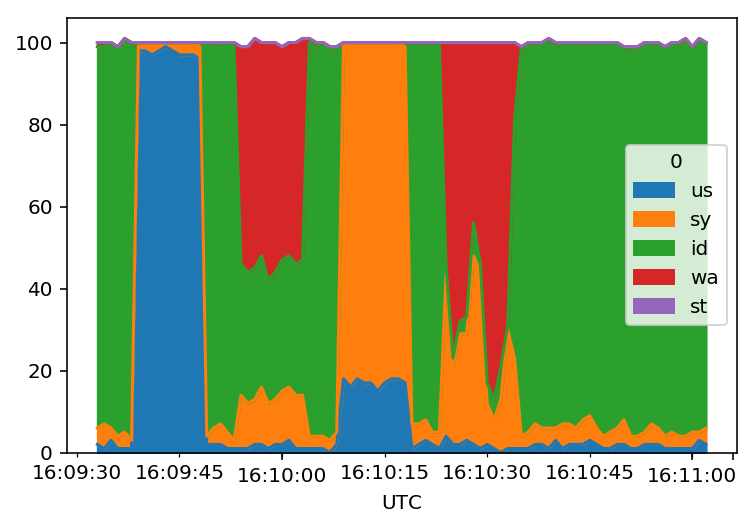

In [4]:
cpu_data.plot.area();